## Final project

text stuff to do: 
- clean encoding (ÛÏ) 
- count hashtags, @ signs, urls, punctuation, sentence to punctuation ratio
- :pparrot: emojis???
- general research to tokenize tweets & try out different tokenizing methods
- remove punctuation 
- use SVD to condense, try PCA
- remove stuff to make it look like final project
- research to see how we can use location or keywords

ask john:
- best way to clean encoding
- how to add features to model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import glob

In [2]:
df = pd.read_csv('../data/01_raw/train.csv')

In [3]:
df.sample(10)

,id,keyword,location,text,target
5341,7623,pandemonium,Lagos,&gt;&gt; @GidiExclusixe Shock In Aba As Woman ...,0
1198,1724,buildings%20burning,Quincy MA,@DougMartin17 Fireman Ed runs into burning bui...,1
30,44,NaN,NaN,The end!,0
382,551,arson,USA,Thousands attend a rally organized by Peace No...,1
6645,9519,terrorist,Niall's arms,@ShipsXAnchors IDEK HOW IS THERE PEOPLE WHO A...,0
1737,2501,collided,NaN,Cyclist who collided with runner on Roanoke gr...,1
902,1304,bloody,NaN,You know how they say the side effects low &am...,0
2077,2983,dead,"Sochi, KDA, RU",@hlportal Hello! I'm looking for mod Cold Ice....,0
5395,7696,panicking,"Petaluma, CA",@QuotesTTG Save the panicking for when you get...,0
1284,1852,burned,DC,burned 202 calories doing 30 minutes of Walkin...,0


In [4]:
from sklearn.model_selection import train_test_split

X = df["text"]
y = df["target"]

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

stops = set(stopwords.words('english'))
stops = map(lambda x:x.lower(),stops)
vectorizer = TfidfVectorizer(stop_words=stops)
vectorizer.fit(X)

# extract features
x_train = vectorizer.transform(X_train)
x_test = vectorizer.transform(X_test)

In [6]:
print(x_train.shape, x_test.shape)

(5329, 21498) (2284, 21498)


In [7]:
from sklearn.linear_model import LogisticRegression

review_classifier = LogisticRegression(random_state = 0).fit(x_train, y_train)

In [8]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

# precision, recall, f1, and average precision below
y_pred = review_classifier.predict(x_test)
print("Precision:", round(precision_score(y_test, y_pred, average='binary'),2))
print("Recall:", round(recall_score(y_test, y_pred, average='binary'),2))
print("F1:", round(f1_score(y_test, y_pred, average='binary'),2))
print("Average Precision:", round(average_precision_score(y_test, y_pred),2))

Precision: 0.85
Recall: 0.65
F1: 0.74
Average Precision: 0.7


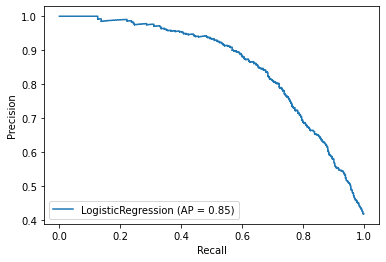

In [9]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

# plot precision-recall curve
y_pred_prob = review_classifier.predict_proba(x_test)
precision_recall_curve_values = precision_recall_curve(y_test, y_pred_prob[:,1])
plot_precision_recall_curve(estimator=review_classifier, X=x_test, y=y_test)

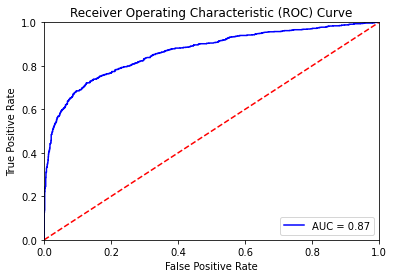

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# plot ROC
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Repeat above steps on cleaned tweets

In [11]:
dfclean = pd.read_csv('../data/02_clean/train.csv', encoding='utf-8')

In [12]:
dfclean.head(1)

,id,keyword,location,text,target,mentions,mentions_cnt,mentions_bool,hashtags,hashtags_cnt,hashtags_bool,links,links_cnt,links_bool,uprchar_pct,lwrchar_pct,lwrcase_pct,upprcase_pct,titlecase_pct,tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,[],0,0,['earthquake'],1,1,[],0,0,0.144928,0.666667,0.538462,0.076923,0.384615,deeds reason __hashtag__ may allah forgive us


In [13]:
cleanX = dfclean["tweet"]
cleany = dfclean["target"]

cX_train, cX_test, cy_train, cy_test = train_test_split(cleanX, cleany, test_size = 0.3, random_state = 0)

In [14]:
vectorizer = TfidfVectorizer()
vectorizer.fit(cleanX)

# extract features
cx_train = vectorizer.transform(cX_train)
cx_test = vectorizer.transform(cX_test)

In [15]:
print(cx_train.shape, cx_test.shape)

(5329, 12843) (2284, 12843)


In [16]:
review_classifier_c = LogisticRegression(random_state = 0).fit(cx_train, cy_train)

In [17]:
# precision, recall, f1, and average precision below
cy_pred = review_classifier_c.predict(cx_test)
print("Precision:", round(precision_score(cy_test, cy_pred, average='binary'),2))
print("Recall:", round(recall_score(cy_test, cy_pred, average='binary'),2))
print("F1:", round(f1_score(cy_test, cy_pred, average='binary'),2))
print("Average Precision:", round(average_precision_score(cy_test, cy_pred),2))

Precision: 0.85
Recall: 0.65
F1: 0.73
Average Precision: 0.69


### Tfidf + percentage features

In [18]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleanX)

In [19]:
X_df = pd.DataFrame.sparse.from_spmatrix(X, columns=vectorizer.get_feature_names())
X_df.head()

,__,__hashtag__,__link__,__mention__,_one,aa,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,...,ûò,ûòthe,ûòåêcnbc,ûó,ûó__hashtag__,ûóher,ûókody,ûónegligence,ûótech,ûówe
0,0.0,0.135134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.165141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.252505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
percents = dfclean[['uprchar_pct','lwrchar_pct','lwrcase_pct','upprcase_pct','titlecase_pct']]

In [21]:
pctx = pd.concat([X_df, percents], axis=1)
pctx.head(1)

,__,__hashtag__,__link__,__mention__,_one,aa,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,...,ûóher,ûókody,ûónegligence,ûótech,ûówe,uprchar_pct,lwrchar_pct,lwrcase_pct,upprcase_pct,titlecase_pct
0,0.0,0.135134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.144928,0.666667,0.538462,0.076923,0.384615


In [22]:
pctX_train, pctX_test, pcty_train, pcty_test = train_test_split(pctx, cleany, test_size = 0.3, random_state = 0)
print(pctX_train.shape, pctX_test.shape)

(5329, 12848) (2284, 12848)


In [23]:
pctX_train.head()

,__,__hashtag__,__link__,__mention__,_one,aa,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,...,ûóher,ûókody,ûónegligence,ûótech,ûówe,uprchar_pct,lwrchar_pct,lwrcase_pct,upprcase_pct,titlecase_pct
476,0.0,0.00000,0.000000,0.090643,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.037594,0.774436,0.833333,0.041667,0.083333
4854,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.015385,0.800000,0.916667,0.041667,0.083333
4270,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.055556,0.777778,0.666667,0.000000,0.333333
992,0.0,0.00000,0.000000,0.281363,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.034884,0.813953,0.818182,0.090909,0.090909
4475,0.0,0.37765,0.083869,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.063492,0.658730,0.789474,0.052632,0.105263


In [24]:
review_classifier_pct = LogisticRegression(random_state = 0).fit(pctX_train, pcty_train)

pcty_pred = review_classifier_pct.predict(pctX_test)
print("Precision:", round(precision_score(pcty_test, pcty_pred, average='binary'),2))
print("Recall:", round(recall_score(pcty_test, pcty_pred, average='binary'),2))
print("F1:", round(f1_score(pcty_test, pcty_pred, average='binary'),2))
print("Average Precision:", round(average_precision_score(pcty_test, pcty_pred),2))

/Users/xiaohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:509: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/xiaohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:509: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


Precision: 0.84
Recall: 0.65
F1: 0.73
Average Precision: 0.69


### Tfidf + percentage features + boolean features

In [25]:
percents_bool = dfclean[['uprchar_pct','lwrchar_pct','lwrcase_pct','upprcase_pct',
                         'titlecase_pct', 'mentions_bool','hashtags_bool', 'links_bool']]
pctboolx = pd.concat([X_df, percents_bool], axis=1)
pctboolx.head(1)

,__,__hashtag__,__link__,__mention__,_one,aa,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,...,ûótech,ûówe,uprchar_pct,lwrchar_pct,lwrcase_pct,upprcase_pct,titlecase_pct,mentions_bool,hashtags_bool,links_bool
0,0.0,0.135134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.144928,0.666667,0.538462,0.076923,0.384615,0,1,0


In [26]:
pbX_train, pbX_test, pby_train, pby_test = train_test_split(pctboolx, cleany, test_size = 0.3, random_state = 0)
print(pbX_train.shape, pbX_test.shape)

(5329, 12851) (2284, 12851)


In [27]:
pbX_train.head()

,__,__hashtag__,__link__,__mention__,_one,aa,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,...,ûótech,ûówe,uprchar_pct,lwrchar_pct,lwrcase_pct,upprcase_pct,titlecase_pct,mentions_bool,hashtags_bool,links_bool
476,0.0,0.00000,0.000000,0.090643,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.037594,0.774436,0.833333,0.041667,0.083333,1,0,0
4854,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.015385,0.800000,0.916667,0.041667,0.083333,0,0,0
4270,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.055556,0.777778,0.666667,0.000000,0.333333,0,0,0
992,0.0,0.00000,0.000000,0.281363,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.034884,0.813953,0.818182,0.090909,0.090909,1,0,0
4475,0.0,0.37765,0.083869,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.063492,0.658730,0.789474,0.052632,0.105263,0,1,1


In [28]:
review_classifier_pb = LogisticRegression(random_state = 0).fit(pbX_train, pby_train)

pby_pred = review_classifier_pb.predict(pbX_test)
print("Precision:", round(precision_score(pby_test, pby_pred, average='binary'),2))
print("Recall:", round(recall_score(pby_test, pby_pred, average='binary'),2))
print("F1:", round(f1_score(pby_test, pby_pred, average='binary'),2))
print("Average Precision:", round(average_precision_score(pby_test, pby_pred),2))

/Users/xiaohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:509: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/xiaohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:509: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


Precision: 0.82
Recall: 0.65
F1: 0.73
Average Precision: 0.68
